# Analysis and Visualization of Complex Agro-Environmental Data
---
## Bivariate analysis and visualization

In [2]:
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

In [3]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

In [4]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(df.iloc[:,5:15], axis=1, inplace=True)

# let's rename some columns so that they make sense
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True" means that df will be updated

# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

In [5]:
# Check data types
pd.options.display.max_rows = 154 # maximum number of rows displayed.
df.dtypes

Site_code                                object
Latitude                                float64
Longitude                               float64
Country                                  object
Catchment_name                           object
Water_source_type                        object
Flow_regime                              object
Altitude                                  int64
Geological_typology                      object
Actual_river_slope                      float64
Natural_sediment                        float64
Elevation_mean_catch                    float64
prec_ann_catch                          float64
temp_ann                                float64
temp_jan                                float64
temp_jul                                float64
Barriers_catchment_down                   int64
Barriers_river_segment_up               float64
Barriers_river_segment_down             float64
Barriers_number_river_segment_up        float64
Barriers_number_river_segment_down      

### Visualizing pairs of `categorical` variables

#### Crosstabulate categorical data

In [6]:
ctab = pd.crosstab(df['Eutrophication'], df['Salmo trutta fario'])
print(ctab)

Salmo trutta fario    0     1
Eutrophication               
1.0                 691  2313
3.0                 713   484
4.0                 433   149
5.0                  78    16


#### Barplot

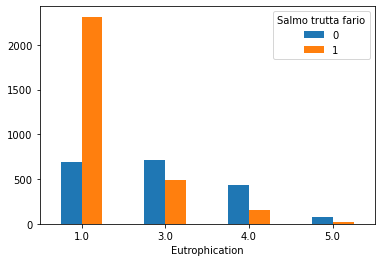

In [11]:

# Creating barplot from crosstable
barplot = ctab.plot.bar(rot=0)

### visualizing `categorical` *versus* `continuous` variables

#### Barplots

`Barplots` are typically used to visualize quantitative variables against categorical variables. This visualization is preferred when there is a limited number of categories and are used when the focus is on comparing quantities. If each category has a correspondent sample of observations, then barplots must show error bars to express data variability.

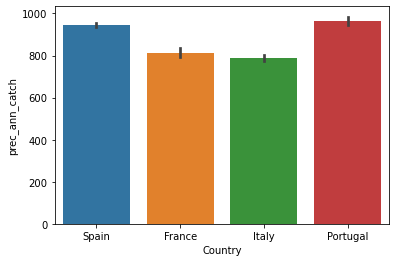

In [12]:
sns.barplot(x="Country", y="prec_ann_catch", data=df)
plt.show()

In [22]:
sns.barplot(data=df, x="Catchment_name", y="prec_ann_catch", estimator="mean")
plt.xticks(rotation=90)
plt.show()

TypeError: 'str' object is not callable

In [14]:
sns.barplot(data=df, x="Catchment_name", y="prec_ann_catch", estimator="mean", color="skyblue")
plt.xticks(rotation=90)
plt.show()

TypeError: 'str' object is not callable

#### Boxplots

`Boxplots` are also often use to visualize quantitative variables against categorical variables but now the focus is on analysing overlap among samples' distributions.

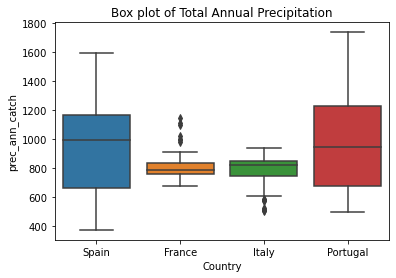

In [15]:
sns.boxplot(x="Country", y="prec_ann_catch", data=df).set_title("Box plot of Total Annual Precipitation")
plt.show()

#### violin plots

`violin plots` are increasingly used over boxplot to analyse overlap among samples. The probability distribution allows more detail on analysing overlap among samples.  

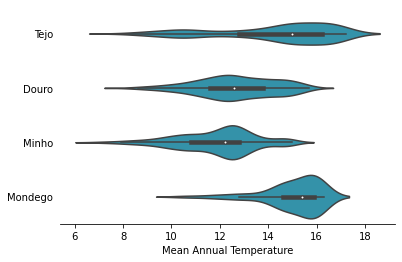

In [16]:
dfsub = df[(df['Catchment_name']=='Mondego') | 
    (df['Catchment_name']=='Douro') |
    (df['Catchment_name']=='Minho') |
    (df['Catchment_name']=='Tejo')
    ]
sns.violinplot(
    data= dfsub,
    x='temp_ann',
    y='Catchment_name',
    color='#219ebc', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    )
plt.tick_params(left=False) # removes tickmarks
sns.despine(left=True)
plt.xlabel('Mean Annual Temperature')
plt.ylabel('')
plt.show()

#### Stripplots

`Stripplots` are used with the same end as boxplots and violin plots. A `jitter` function is used to randomly display data points along an axis that is perpendicular to the continuous variable axis, which forms a strip of variable width where obervations are plotted. 

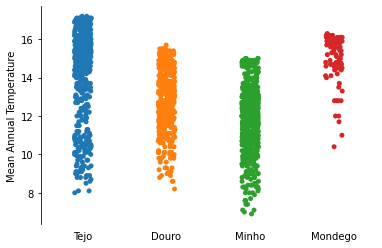

In [17]:
# Less code

dfsub = df[(df['Catchment_name']=='Mondego') | 
    (df['Catchment_name']=='Douro') |
    (df['Catchment_name']=='Minho') |
    (df['Catchment_name']=='Tejo')
    ]

sns.stripplot(
    data= dfsub,
    x='Catchment_name',
    y='temp_ann',
    )
plt.tick_params(bottom=False) # removes bottom tickmarks
sns.despine(bottom=True)
plt.ylabel('Mean Annual Temperature')
plt.xlabel('')
plt.show()

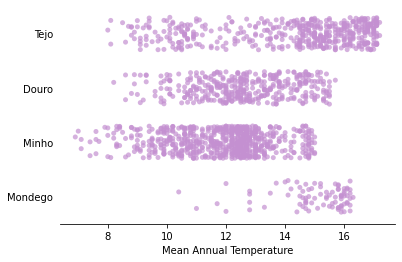

In [19]:
# Less code and inverted

dfsub = df[(df['Catchment_name']=='Mondego') | 
    (df['Catchment_name']=='Douro') |
    (df['Catchment_name']=='Minho') |
    (df['Catchment_name']=='Tejo')
    ]

sns.stripplot(
    data= dfsub,
    x='temp_ann',
    y='Catchment_name',
    jitter=0.3, # the ammount of jitter (i.e. random point dispersion along the x-axis).
    linewidth=0, # no line around the points
    color='#c490d1', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    alpha=.7,
    s=5 # point size
    )
plt.tick_params(left=False) # removes bottom tickmarks
sns.despine(left=True)
plt.xlabel('Mean Annual Temperature')
plt.ylabel('')
plt.show()

#### Mixed visualizations

It is becoming frequent to mix visualizations such as boxplots and strip plots in the same plot, offering complementary information about the data.

##### Box plots with jitter

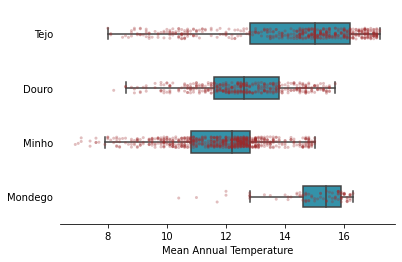

In [20]:

dfsub = df[(df['Catchment_name']=='Mondego') | 
    (df['Catchment_name']=='Douro') |
    (df['Catchment_name']=='Minho') |
    (df['Catchment_name']=='Tejo')
    ]
sns.boxplot(
    data= dfsub,
    x='temp_ann',
    y='Catchment_name',
    width=0.4,
    fliersize=0,
    color='#219ebc', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    )
sns.stripplot(
    data= dfsub,
    x='temp_ann',
    y='Catchment_name',
    jitter=0.1, # the ammount of jitter (i.e. random point dispersion along the x-axis).
    linewidth=0, # no line around the poits
    color='#9e2a2b', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    alpha=.3,
    s=3, # point size
    )
plt.tick_params(left=False) # removes tickmarks
sns.despine(left=True)
plt.xlabel('Mean Annual Temperature')
plt.ylabel('')
plt.show()

### visualizing pairs of `continuous` variables

#### Line plot



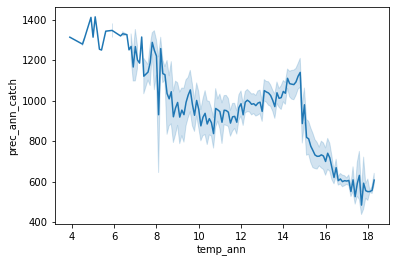

In [23]:
sns.lineplot(data=df, x='temp_ann', y='prec_ann_catch')
plt.show()

#### Scatter plots

`scatter plots` are a useful method of comparing continuous variables against each other. They often are used to map independent and dependent variables on a 2D graph. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

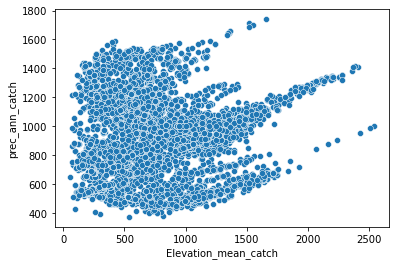

In [24]:
sns.scatterplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch')
plt.show()

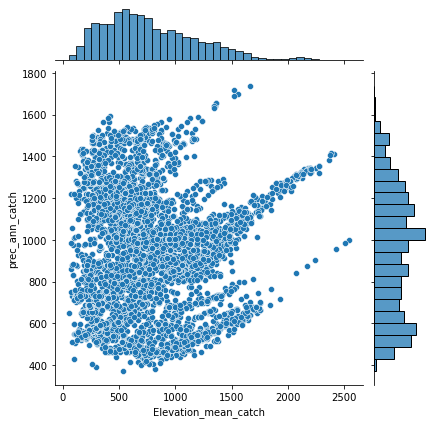

In [25]:
sns.jointplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch')
plt.show()

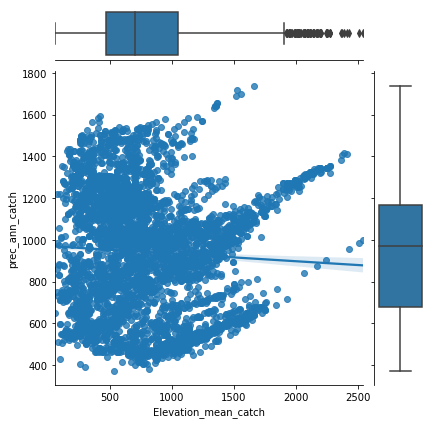

In [26]:
g = sns.JointGrid(data=df, x='Elevation_mean_catch', y='prec_ann_catch')
g.plot(sns.regplot, sns.boxplot)
plt.show()

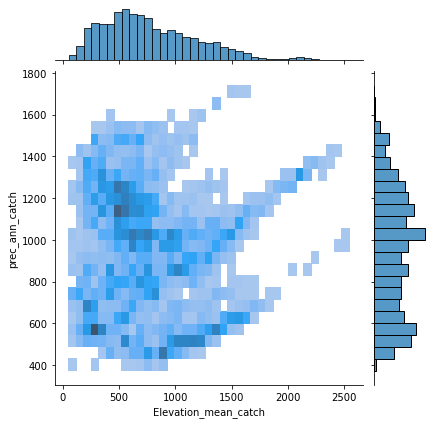

In [27]:
sns.jointplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch', kind="hist")
plt.show()

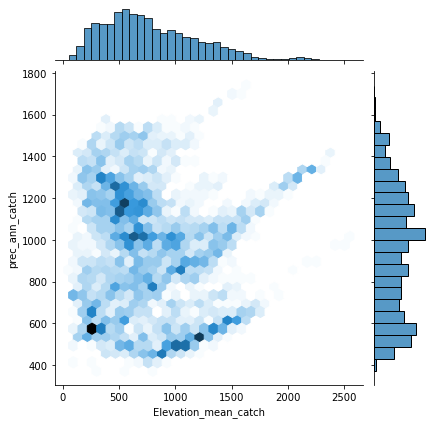

In [28]:
sns.jointplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch', kind="hex")
plt.show()

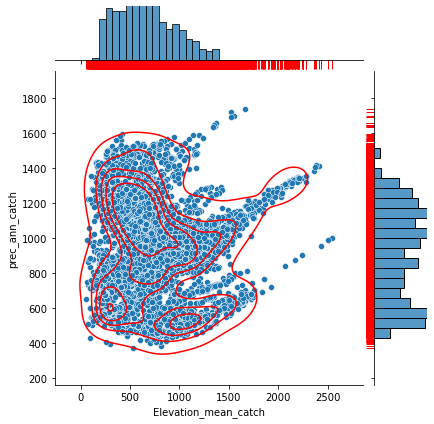

In [29]:
g = sns.jointplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch')
g.plot_joint(sns.kdeplot, color="r", zorder=1, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)
plt.show()

In [ ]:
sns.scatterplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch', hue='Country', palette="colorblind")
plt.show()

In [ ]:
sns.jointplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch', hue='Country')
plt.show()

In [ ]:
sns.jointplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch', hue='Country', kind="kde")
plt.show()

ASSIGNEMENT 4

EXERCICE 1

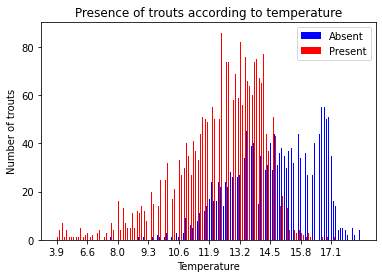

In [87]:
import matplotlib.pyplot as plt

# Create an empty dictionary to store counts
count_temp = {}

# Iterate over each row of the DataFrame
for index, row in df.iterrows():
    temp = row['temp_ann']
    presence = row['Salmo trutta fario']
    
    # Check if the temperature is NaN
    if not pd.isna(temp):
        # Check if the temperature already exists in the dictionary
        if temp in count_temp:
            # Increment the appropriate counter
            count_temp[temp][presence] += 1
        else:
            # Add the temperature to the dictionary with initialized counter
            count_temp[temp] = {0: 0, 1: 0}
            count_temp[temp][presence] += 1

# Extract temperatures and counts from the dictionary
temperatures = sorted(count_temp.keys())
num_of_0 = [count_temp[temp][0] for temp in temperatures]
num_of_1 = [count_temp[temp][1] for temp in temperatures]

# Select only certain temperatures to display in the legend
temps_to_display = temperatures[::13]  # Select every 13th temperature
index_to_display = range(0, len(temperatures), 13)  # Corresponding indexes of selected temperatures

# Create an index for temperatures
index = range(len(temperatures))

# Bar width
bar_width = 0.35

# Plot the histogram
plt.bar(index, num_of_0, bar_width, color='blue', label='Absent')
plt.bar([i + bar_width for i in index], num_of_1, bar_width, color='red', label='Present')

# Add labels and titles
plt.xlabel('Temperature')
plt.ylabel('Number of trouts')
plt.title('Presence of trouts according to temperature')
plt.xticks(index_to_display, temps_to_display)
plt.legend()

# Show the plot
plt.show()




EXERCICE 2

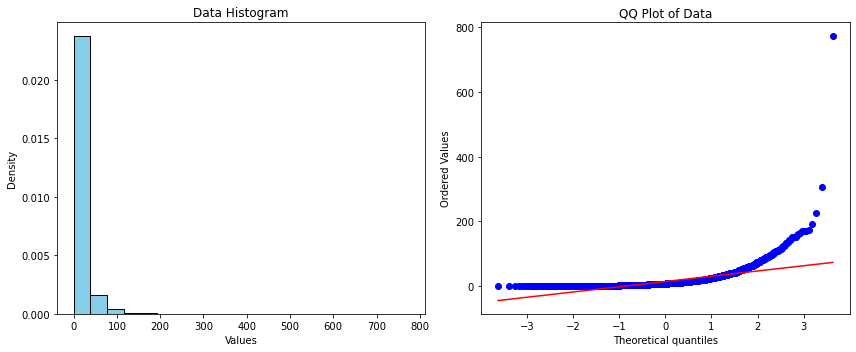

Values of slopes greater than 20: [23.654, 23.361, 23.791999999999998, 20.921, 20.102, 20.102, 20.102, 38.757, 21.884, 32.34, 56.732, 35.296, 33.169000000000004, 41.662, 52.64, 45.982, 28.993000000000002, 48.086000000000006, 56.618, 24.453000000000003, 20.436, 24.454, 29.03, 50.998999999999995, 41.188, 86.43799999999999, 20.730999999999998, 33.52, 47.248000000000005, 35.163000000000004, 41.493, 26.528000000000002, 20.242, 26.771, 26.771, 26.771, 35.26, 21.906999999999996, 31.432, 34.949, 99.603, 40.965, 24.750999999999998, 31.662, 24.884, 34.328, 22.391, 33.032, 26.458000000000002, 27.404, 26.991, 24.849, 44.545, 33.868, 26.057, 32.418, 21.408, 28.296999999999997, 23.031999999999996, 24.764, 28.819000000000003, 27.712, 70.999, 50.07, 24.898000000000003, 62.46, 30.326, 63.233000000000004, 32.286, 56.575, 21.999000000000002, 20.794, 27.599, 50.38, 50.38, 29.414, 61.193000000000005, 31.215, 20.452, 20.29, 27.553, 20.361, 58.136, 31.590999999999998, 27.835, 27.712, 24.065, 24.9459999999999

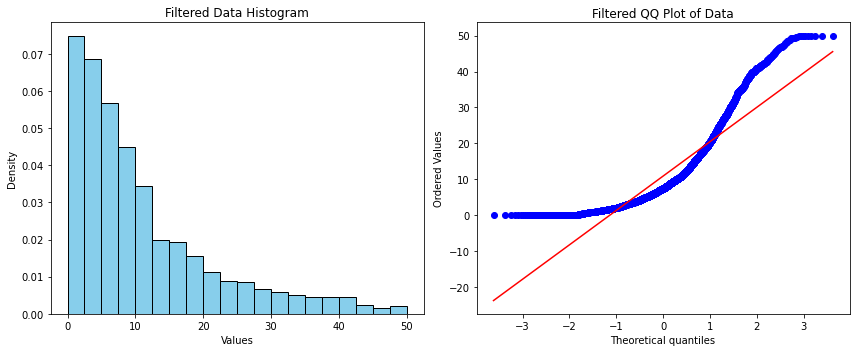

The 95th percentile of the slope data is: 50.44300000000004
Shapiro-Wilk Test: Statistic = 0.5163244009017944 , p-value = 0.0
D'Agostino's K^2 Test: Statistic = 8128.03772908116 , p-value = 0.0
Kolmogorov-Smirnov Test: Statistic = 0.8359504586391296 , p-value = 0.0
Anderson-Darling Test: Statistic = 541.4514465468019


In [88]:

import scipy.stats as stats

# Extract values from the "actual_river_slope" column without NaN
actual_river_slope_values = df['Actual_river_slope'].dropna().tolist()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the histogram
ax1.hist(actual_river_slope_values, bins=20, density=True, color='skyblue', edgecolor='black')
ax1.set_title('Data Histogram')
ax1.set_xlabel('Values')
ax1.set_ylabel('Density')

# Plot the QQ plot
stats.probplot(actual_river_slope_values, dist="norm", plot=ax2)
ax2.set_title('QQ Plot of Data')
ax2.get_lines()[1].set_color('red')  # Reference line color

# Show the figure
plt.tight_layout()
plt.show()

# Extract values of slopes greater than 20
slopes_sup_20 = [slope for slope in actual_river_slope_values if slope > 20]

# Print values of slopes greater than 20
print("Values of slopes greater than 20:", slopes_sup_20)

# Create a new list of slopes by removing values greater than 50
actual_river_slope_values_filtre = [slope for slope in actual_river_slope_values if slope <= 50]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the histogram
ax1.hist(actual_river_slope_values_filtre, bins=20, density=True, color='skyblue', edgecolor='black')
ax1.set_title('Filtered Data Histogram')
ax1.set_xlabel('Values')
ax1.set_ylabel('Density')

# Plot the QQ plot
stats.probplot(actual_river_slope_values_filtre, dist="norm", plot=ax2)
ax2.set_title('Filtered QQ Plot of Data')
ax2.get_lines()[1].set_color('red')  # Reference line color

# Show the figure
plt.tight_layout()
plt.show()

# Calculate the 95th percentile of the slope data
quantile_95 = np.percentile(actual_river_slope_values, 95)

# Print the 95th percentile
print("The 95th percentile of the slope data is:", quantile_95)

# Perform the Shapiro-Wilk test
shapiro_stat, shapiro_p_value = stats.shapiro(actual_river_slope_values)
print("Shapiro-Wilk Test: Statistic =", shapiro_stat, ", p-value =", shapiro_p_value)

# Perform the D'Agostino's K^2 test
dagostino_stat, dagostino_p_value = stats.normaltest(actual_river_slope_values)
print("D'Agostino's K^2 Test: Statistic =", dagostino_stat, ", p-value =", dagostino_p_value)

# Perform the Kolmogorov-Smirnov test
ks_stat, ks_p_value = stats.kstest(actual_river_slope_values, 'norm')
print("Kolmogorov-Smirnov Test: Statistic =", ks_stat, ", p-value =", ks_p_value)

# Perform the Anderson-Darling test
anderson_stat, anderson_critical_values, anderson_significance_levels = stats.anderson(actual_river_slope_values, dist='norm')
print("Anderson-Darling Test: Statistic =", anderson_stat)
for i, crit_val in enumerate(anderson_critical_values):
    if anderson_stat < crit_val:
        print("The distribution is normal at significance level", anderson_significance_levels[i])
        break


Exercice 3

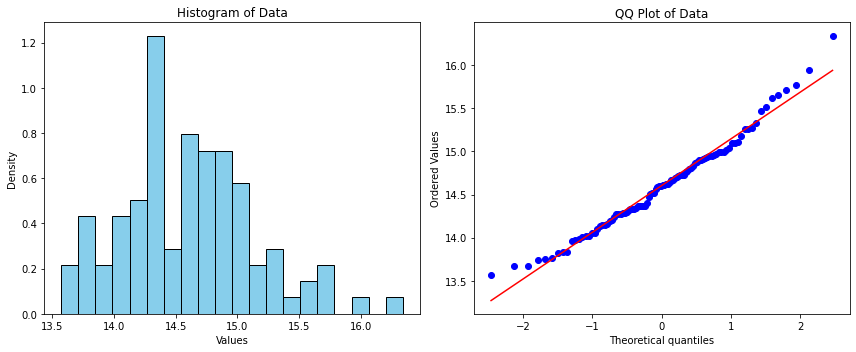

Shapiro-Wilk Test: Statistic = 0.9791542291641235 , p-value = 0.1141965389251709
D'Agostino's K^2 Test: Statistic = 5.317910715180412 , p-value = 0.0700213308033426
Kolmogorov-Smirnov Test: Statistic = 1.0 , p-value = 0.0
Anderson-Darling Test: Statistic = 0.4198755800434668
The distribution is normal at significance level 15.0


In [90]:
data_simul = []

# Perform sampling 100 times
for _ in range(100):
    # Randomly sample with replacement 2000 slope values
    sample = np.random.choice(actual_river_slope_values, size=2000, replace=True)
    
    # Calculate the mean of the sample
    sample_mean = np.mean(sample)
    
    # Add the mean to the list of simulated means
    data_simul.append(sample_mean)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the histogram
ax1.hist(data_simul, bins=20, density=True, color='skyblue', edgecolor='black')
ax1.set_title('Histogram of Data')
ax1.set_xlabel('Values')
ax1.set_ylabel('Density')

# Plot the QQ plot
stats.probplot(data_simul, dist="norm", plot=ax2)
ax2.set_title('QQ Plot of Data')
ax2.get_lines()[1].set_color('red')  # Reference line color

# Show the figure
plt.tight_layout()
plt.show()

# Perform the Shapiro-Wilk test
shapiro_stat, shapiro_p_value = stats.shapiro(data_simul)
print("Shapiro-Wilk Test: Statistic =", shapiro_stat, ", p-value =", shapiro_p_value)

# Perform the D'Agostino's K^2 test
dagostino_stat, dagostino_p_value = stats.normaltest(data_simul)
print("D'Agostino's K^2 Test: Statistic =", dagostino_stat, ", p-value =", dagostino_p_value)

# Perform the Kolmogorov-Smirnov test
ks_stat, ks_p_value = stats.kstest(data_simul, 'norm')
print("Kolmogorov-Smirnov Test: Statistic =", ks_stat, ", p-value =", ks_p_value)

# Perform the Anderson-Darling test
anderson_stat, anderson_critical_values, anderson_significance_levels = stats.anderson(data_simul, dist='norm')
print("Anderson-Darling Test: Statistic =", anderson_stat)
for i, crit_val in enumerate(anderson_critical_values):
    if anderson_stat < crit_val:
        print("The distribution is normal at significance level", anderson_significance_levels[i])
        break
